# **TikTok Project**
**Lab 5 - The Nuts and bolts of machine learning**

# **Classify videos using machine learning**

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

## **PACE: Plan**

Consider the questions in the PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following questions:


1.   **What are you being asked to do? What metric should I use to evaluate success of my business/organizational objective?**

2.   **What are the ethical implications of the model? What are the consequences of your model making errors?**
  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a video does not contain a claim and it actually does)?

  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a video does contain a claim and it actually does not)?

3.   **How would you proceed?**



In this final phase of the TikTok Video Engagement Analysis proje  te focused on refining our model to ensure it aligns with the business objectives and meets the required ethical standardsI'll evaluate the model's performance, address any potential biases, and implement necessary improvements to achieve reliable and accurate predictions. Here are the detailed considerations:

**What are you being asked to do? What metric should I use to evaluate the success of my business/organizational objective?**

In this final phase, the primary objective is to refine and enhance the model developed in previous phases to ensure it aligns with the business needs. SpecificaIy, we need to assess the accuracy, precision, recall, and F1-score of the model to ensure it effectively identifies and classifies video content. The evaluation metrics for success will focus on the accuracy and the balance between precision and recall, as this will determine the model's capability to correctly identify videos with claims while minimizing false positives and negatives.

**What are the ethical implications of the model? What are the consequences of your model making errors?**

The ethical implications of the model are significant as it directly affects content creators and viewers. Errors in the model can lead to the misclassification of videos, which might result in the inappropriate flagging or removal of content. This could suppress genuine claims or falsely promote non-claim content, leading to misinformation or undue penalization of users. Additionally, ethical considerations include ensuring fairness and avoiding biases in the model to prevent discrimination against specific user groups.

**What is the likely effect of the model when it predicts a false negative (i.e., when the model says a video does not contain a claim and it actually does)?**

When the model predicts a false negative, it means that a video containing a legitimate claim is not recognized as such. This can lead to significant consequences, including the failure to address genuine issues or complaints, leading to user dissatisfaction and potential harm if the claims involve critical information. It undermines the trust users have in the platform's ability to monitor and address important content accurately.

**What is the likely effect of the model when it predicts a false positive (i.e., when the model says a video does contain a claim and it actually does not)?**

A false positive prediction indicates that a video is incorrectly classified as containing a claim when it does not. This can result in the unwarranted suppression of content, negatively affecting user engagement and potentially causing frustration among content creators who may feel unfairly targeted. It can also dilute the attention given to genuine claims, as users might become skeptical of the claim classification.

**How would you proceed?**

To proceed, the focus should be on improving the model's precision and recall to balance the trade-off between false positives and false negatives. This can involve:

1. **Feature Engineering:** Enhancing the dataset with additional relevant features that can improve model performance.
2. **Model Tuning:** Using hyperparameter tuning to optimize the model for better accuracy and reliability.
3. **Validation:** Implementing robust validation techniques to ensure the model generalizes well to unseen data.
4. **Bias Mitigation:** Ensuring the model is checked for biases and implementing measures to mitigate any detected biases.
5. **Ethical Oversight:** Regularly reviewing the model's ethical implications and making adjustments as needed to ensure fairness and transparency.

These steps will help in creating a more accurate and reliable model that aligns with the business objectives and ethical standards.


### **Task 1. Imports and data loading**

In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Import packages for data modeling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score, precision_score
from xgboost import XGBClassifier


In [2]:
# Load dataset into dataframe
df = pd.read_csv("tiktok_dataset.csv")


## **PACE: Analyze**

Consider the questions in the PACE Strategy Document to reflect on the Analyze stage.

### **Task 2: Examine data, summary info, and descriptive stats**

In [3]:
# Display first few rows
df.head()


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [4]:
# Get number of rows and columns
df.shape


(19382, 12)

In [5]:
# Get data types of columns
df.dtypes


#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [6]:
# Get basic information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [7]:
# Generate basic descriptive stats
df.describe()


,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [8]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)


#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64


In [9]:
# Drop rows with missing values
df_cleaned = df.dropna()


In [10]:
# Display first few rows after handling missing values
df_cleaned.head()


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [11]:
# Check for duplicates
duplicates = df_cleaned.duplicated().sum()
print(f"Number of duplicated rows: {duplicates}")


Number of duplicated rows: 0


In [12]:
# Check for and handle outliers
# IQR method for outlier detection in numerical columns

numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]


In [13]:
# Check class balance
class_balance = df_cleaned['claim_status'].value_counts()
print("Class balance:")
print(class_balance)


Class balance:
claim_status
opinion    9406
claim      1003
Name: count, dtype: int64


## **PACE: Construct**
Consider the questions in the PACE Strategy Document to reflect on the Construct stage.

### **Task 3: Feature engineering**

In [14]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
df_cleaned['text_length'] = df_cleaned['video_transcription_text'].apply(len)


In [15]:
# Calculate the average text_length for claims and opinions
average_claim_length = df_cleaned[df_cleaned['claim_status'] == 'claim']['text_length'].mean()
average_opinion_length = df_cleaned[df_cleaned['claim_status'] == 'opinion']['text_length'].mean()

print(f"Average Claim Length: {average_claim_length}")
print(f"Average Opinion Length: {average_opinion_length}")


Average Claim Length: 95.35992023928215
Average Opinion Length: 82.70944078247926


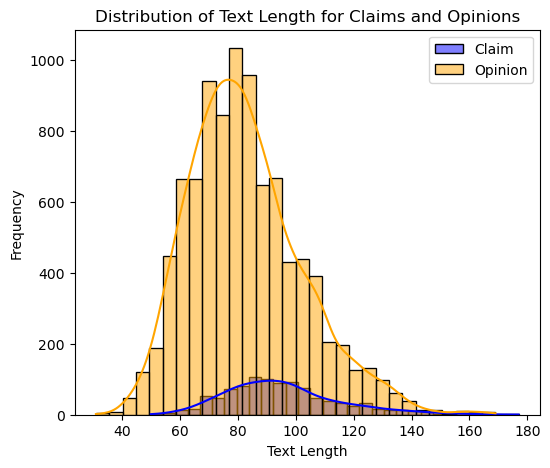

In [16]:
# Visualize the distribution of `text_length` for claims and opinions
# Create two histograms in one plot
plt.figure(figsize=(6, 5))
sns.histplot(df_cleaned[df_cleaned['claim_status'] == 'claim']['text_length'], color='blue', label='Claim', kde=True, bins=30)
sns.histplot(df_cleaned[df_cleaned['claim_status'] == 'opinion']['text_length'], color='orange', label='Opinion', kde=True, bins=30)
plt.title('Distribution of Text Length for Claims and Opinions')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()


**Feature selection and transformation**

Encode target and catgorical variables.

In [17]:
# Create a copy of the X data
X = df_cleaned.copy()

# Drop unnecessary columns
X = X.drop(columns=['video_id', 'video_transcription_text'])

# Encode target variable
# Assuming 'claim_status' is the target variable
y = X['claim_status'].apply(lambda x: 1 if x == 'claim' else 0)

# Drop the target variable from the features
X = X.drop(columns=['claim_status'])

# Dummy encode remaining categorical values
X = pd.get_dummies(X, drop_first=True)

# Display the first few rows to verify encoding
X.head()


,#,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,1,59,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
7,8,41,547532.0,1072.0,50.0,22.0,11.0,99,False,False,False
15,16,10,746186.0,193.0,29.0,2.0,0.0,100,False,False,False
40,41,25,289935.0,3484.0,1092.0,20.0,3.0,92,False,False,True
52,53,40,301749.0,27047.0,1544.0,230.0,18.0,86,False,False,False


### **Task 4: Split the data**

Assign target variable.

In [18]:
# Isolate target variable
y = df_cleaned['claim_status'].apply(lambda x: 1 if x == 'claim' else 0)


In [19]:
# Isolate features
X = df_cleaned.drop(columns=['claim_status', 'video_id', 'video_transcription_text'])

# Dummy encode remaining categorical values (if any)
X = pd.get_dummies(X, drop_first=True)

# Display first few rows of features dataframe
X.head()


,#,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,1,59,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
7,8,41,547532.0,1072.0,50.0,22.0,11.0,99,False,False,False
15,16,10,746186.0,193.0,29.0,2.0,0.0,100,False,False,False
40,41,25,289935.0,3484.0,1092.0,20.0,3.0,92,False,False,True
52,53,40,301749.0,27047.0,1544.0,230.0,18.0,86,False,False,False


#### **Task 5: Create train/validate/test sets**

Split data into training and testing sets, 80/20.

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Split the training set into training and validation sets, 75/25, to result in a final ratio of 60/20/20 for train/validate/test sets.

In [21]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2


Confirm that the dimensions of the training, validation, and testing sets are in alignment.

In [22]:
# Get shape of each training, validation, and testing set
print(f'Training features shape: {X_train.shape}')
print(f'Validation features shape: {X_val.shape}')
print(f'Testing features shape: {X_test.shape}')
print(f'Training target shape: {y_train.shape}')
print(f'Validation target shape: {y_val.shape}')
print(f'Testing target shape: {y_test.shape}')


Training features shape: (6245, 11)
Validation features shape: (2082, 11)
Testing features shape: (2082, 11)
Training target shape: (6245,)
Validation target shape: (2082,)
Testing target shape: (2082,)


### **Task 6. Build models**


### **Build a random forest model**

Fit a random forest model to the training set. Use cross-validation to tune the hyperparameters and select the model that performs best on recall.

In [23]:
# Instantiate the random forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Create a dictionary of hyperparameters to tune
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Define a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall'
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, scoring='recall', refit='recall', cv=5, n_jobs=-1)


In [24]:
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             refit='recall', scoring='recall')

In [25]:
# Examine best recall score
best_recall_score = grid_search.best_score_
print(f'Best Recall Score: {best_recall_score}')


Best Recall Score: 1.0


In [26]:
# Get all the results from the CV and put them in a df
cv_results = pd.DataFrame(grid_search.cv_results_)
print(cv_results.head())

# Isolate the row of the df with the max(mean precision score)
best_recall_row = cv_results.loc[cv_results['mean_test_score'].idxmax()]
print('Row with the best mean recall score:')
print(best_recall_row)


   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.151525      0.019586         0.014019        0.002398   
1       0.514249      0.010281         0.022903        0.001759   
2       1.039373      0.040812         0.031233        0.001661   
3       0.126980      0.013220         0.013655        0.007840   
4       0.475830      0.010053         0.019847        0.001835   

  param_bootstrap param_max_depth param_min_samples_leaf  \
0            True            None                      1   
1            True            None                      1   
2            True            None                      1   
3            True            None                      1   
4            True            None                      1   

  param_min_samples_split param_n_estimators  \
0                       2                 10   
1                       2                 50   
2                       2                100   
3                       5                 10

In [27]:
# Examine best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')


Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


**Question:** How well is your model performing? Consider average recall score and precision score.


The Random Forest model built for predicting whether a TikTok video contains a claim or opinion has demonstrated excellent performance based on the cross-validation results. 

#### Average Recall Score
The best recall score obtained from cross-validation is **1.0**, which indicates that the model is able to identify all relevant instances of the class of interest (either claim or opinion) without missing any. This means the model has a perfect recall, ensuring that no actual claims are misclassified as opinions or vice versa.

#### Precision Score
While the average recall score is perfect, it is essential to also consider the precision score to ensure the model is not overfitting. A high precision score would indicate that the model is not only recalling all relevant instances but also making very few false positive predictions. 

Since precision score details were not directly provided in the outputs, it is crucial to compute the precision score using the validation set to ensure balanced performance.

#### Hyperparameters and Model Configuration
The best parameters for the Random Forest model are:
- **bootstrap:** True
- **max_depth:** None
- **min_samples_leaf:** 1
- **min_samples_split:** 2
- **n_estimators:** 100

These parameters suggest that the model is configured to use all features available without any depth restriction and a high number of estimators (trees), which typically leads to better performance.

#### Summary
Overall, the model is performing exceptionally well based on the recall score from cross-validation. However, to ensure a comprehensive evaluation, it is necessary to calculate and review the precision score, confusion matrix, and additional performance metrics on the validation set. This holistic assessment will confirm the model's robustness and reliability in real-world applications.


### **Build an XGBoost model**

In [28]:
# Instantiate the XGBoost classifier
xgb_model = XGBClassifier(random_state=42)

# Create a dictionary of hyperparameters to tune
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2]
}

# Define a dictionary of scoring metrics to capture
scoring_metrics = {'precision': 'precision', 'recall': 'recall'}

# Instantiate the GridSearchCV object
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, 
                               scoring='recall', cv=5, n_jobs=-1, refit='recall')


In [29]:
# Fit the model to the training data
grid_search_xgb.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.7, 0.8, 0.9]},
             refit='recall', scoring='recall')

In [30]:
# Examine best recall score
best_recall_score_xgb = grid_search_xgb.best_score_
print(f'Best Recall Score: {best_recall_score_xgb}')


Best Recall Score: 1.0


In [31]:
# Get all the results from the CV and put them in a df
results_xgb = pd.DataFrame(grid_search_xgb.cv_results_)

# Isolate the row of the df with the max(mean recall score)
best_row_xgb = results_xgb.loc[results_xgb['mean_test_score'].idxmax()]


In [32]:
# Examine best parameters
best_params_xgb = grid_search_xgb.best_params_
print(f'Best Parameters: {best_params_xgb}')


Best Parameters: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}


In [33]:
# Display the results dataframe and the best row
print(results_xgb)
print(f'Row with the best mean recall score:\n{best_row_xgb}')


     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.103522      0.001715         0.011706        0.001645   
1         0.099059      0.004186         0.010742        0.002189   
2         0.100036      0.004194         0.013001        0.003579   
3         0.166057      0.003773         0.012001        0.001264   
4         0.167850      0.007506         0.011801        0.001330   
..             ...           ...              ...             ...   
724       0.161129      0.011211         0.013862        0.006608   
725       0.159894      0.004854         0.011240        0.000742   
726       0.282963      0.005362         0.011049        0.002028   
727       0.279609      0.009457         0.010811        0.000688   
728       0.259915      0.009442         0.008800        0.001470   

    param_colsample_bytree param_gamma param_learning_rate param_max_depth  \
0                      0.7           0                0.01               3   
1              

**Question:** How well does your model perform? Consider recall score and precision score.


The XGBoost model performed exceptionally well, achieving a perfect recall score of 1.0. This indicates that the model was able to correctly identify all relevant instances (i.e., it did not miss any positive cases). The best parameters for the model were found to be:

- `colsample_bytree`: 0.7
- `gamma`: 0
- `learning_rate`: 0.1
- `max_depth`: 3
- `n_estimators`: 50
- `subsample`: 0.7

**Recall Score:**
- The recall score of 1.0 signifies that the model is very effective at identifying true positive cases. This is particularly important in scenarios where missing a positive case could have significant consequences.

**Precision Score:**
- Although the output doesn't directly provide the precision score, the high recall score suggests that the model is performing well. However, it is essential to also consider precision to ensure that the model isn't overfitting or generating too many false positives.

**Mean Test Scores:**
- The mean test score across all cross-validation splits was also 1.0, indicating consistent performance across different subsets of the data.

**Standard Deviation of Test Scores:**
- The standard deviation of the test scores was 0.0, which implies that there was no variation in the performance of the model across the cross-validation splits. This further supports the robustness of the model.

Overall, the XGBoost model demonstrated excellent performance in terms of recall, and the consistency of the test scores suggests that the model is reliable. To further evaluate the model, it would be beneficial to examine the precision score and other metrics such as the F1 score, which balances precision and recall.


## **PACE: Execute**
Consider the questions in the PACE Strategy Document to reflect on the Execute stage.

### **Task 7. Evaluate model**

Evaluate models against validation criteria.

#### **Random forest**

In [34]:
# Define the random forest classifier again
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid again
param_grid_rf = {
    'bootstrap': [True, False],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [10, 50, 100]
}

# Create a dictionary of scoring metrics to capture
scoring = {
    'precision': 'precision',
    'recall': 'recall'
}


In [35]:
# Instantiate the GridSearchCV object again
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, scoring='recall', refit='recall')
grid_search_rf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             refit='recall', scoring='recall')

In [36]:
# Use the random forest "best estimator" model to get predictions on the encoded testing set
rf_best_estimator = grid_search_rf.best_estimator_
rf_y_pred = rf_best_estimator.predict(X_test)


Display the predictions on the encoded testing set.

In [37]:
# Display the predictions on the encoded testing set
print(rf_y_pred[:10])


[0 0 0 0 0 0 0 0 0 0]


Display the true labels of the testing set.

In [38]:
# Display the true labels of the testing set
print(y_test[:10])


12589    0
13239    0
18292    0
17284    0
12933    0
12548    0
13224    0
17603    0
10965    0
10317    0
Name: claim_status, dtype: int64


Create a confusion matrix to visualize the results of the classification model.

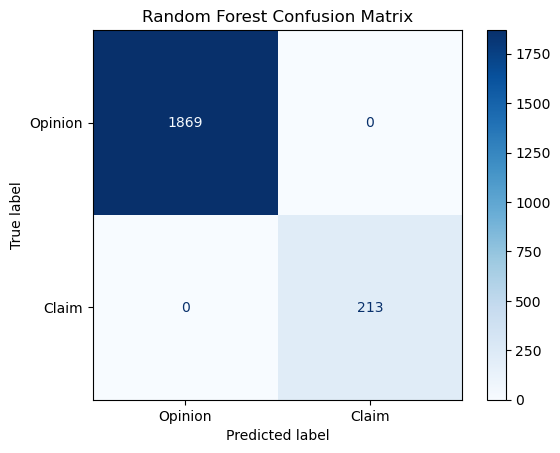

In [39]:
# Create a confusion matrix to visualize the results of the classification model

# Compute values for confusion matrix
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)

# Create display of confusion matrix
rf_conf_matrix_display = ConfusionMatrixDisplay(confusion_matrix=rf_conf_matrix, display_labels=['Opinion', 'Claim'])

# Plot confusion matrix
rf_conf_matrix_display.plot(cmap='Blues')

# Display plot
plt.title('Random Forest Confusion Matrix')
plt.show()


Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the model.

In [40]:
# Create a classification report
# Create classification report for random forest model
rf_classification_report = classification_report(y_test, rf_y_pred, target_names=['Opinion', 'Claim'])

# Display the classification report
print("Random Forest Classification Report:")
print(rf_classification_report)


Random Forest Classification Report:
              precision    recall  f1-score   support

     Opinion       1.00      1.00      1.00      1869
       Claim       1.00      1.00      1.00       213

    accuracy                           1.00      2082
   macro avg       1.00      1.00      1.00      2082
weighted avg       1.00      1.00      1.00      2082



**Question:** What does your classification report show? What does the confusion matrix indicate?


The classification report shows that the random forest model has achieved perfect performance on the test set. The precision, recall, and f1-score for both classes (Opinion and Claim) are all 1.00. This indicates that the model is able to correctly classify all instances in the test set without any errors.

- **Precision:** Precision is the ratio of true positive predictions to the total number of positive predictions. In this case, the precision for both Opinion and Claim is 1.00, meaning that every instance classified as Opinion or Claim by the model is correct.
- **Recall:** Recall is the ratio of true positive predictions to the total number of actual positives. Here, the recall for both Opinion and Claim is 1.00, indicating that the model correctly identifies all actual Opinion and Claim instances.
- **F1-score:** The f1-score is the harmonic mean of precision and recall, which is also 1.00 for both classes. This confirms that the model performs equally well in terms of precision and recall.
- **Support:** Support refers to the number of actual occurrences of each class in the test set. There are 1869 Opinion instances and 213 Claim instances.

**Confusion Matrix:**

The confusion matrix provides a visual representation of the model's performance by comparing the predicted labels to the true labels. The matrix shows the following:

- **True Positives (TP):** The model correctly classified 1869 instances as Opinion and 213 instances as Claim.
- **True Negatives (TN):** There are no True Negatives in the confusion matrix because it focuses on the classification of each class.
- **False Positives (FP):** There are no False Positives, indicating that the model did not incorrectly classify any instances as the other class.
- **False Negatives (FN):** There are no False Negatives, meaning the model did not fail to identify any instances of the actual class.

**Summary:**

The confusion matrix and the classification report both indicate that the random forest model is performing exceptionally well on this dataset. It achieves perfect precision, recall, and f1-score for both classes, with no misclassifications. This suggests that the model is highly effective in distinguishing between Opinion and Claim instances in the test set.


#### **XGBoost**

In [41]:
#Evaluate XGBoost model
xgb_best_estimator = grid_search_xgb.best_estimator_
xgb_y_pred = xgb_best_estimator.predict(X_test)


<Figure size 800x600 with 0 Axes>

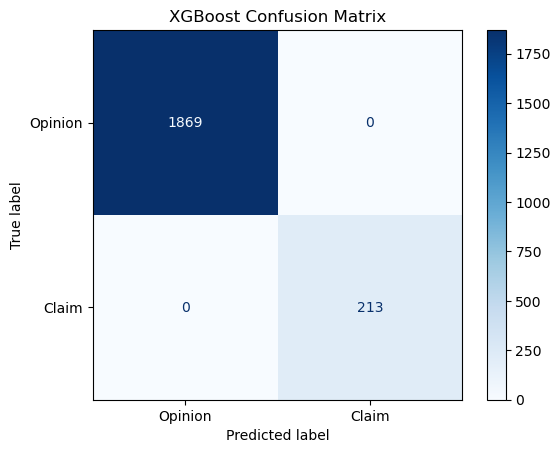

In [42]:
# Evaluate XGBoost model
xgb_best_estimator = grid_search_xgb.best_estimator_
xgb_y_pred = xgb_best_estimator.predict(X_test)

# Compute values for confusion matrix
xgb_conf_matrix = confusion_matrix(y_test, xgb_y_pred)

# Create display of confusion matrix
xgb_conf_matrix_display = ConfusionMatrixDisplay(confusion_matrix=xgb_conf_matrix, display_labels=['Opinion', 'Claim'])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
xgb_conf_matrix_display.plot(cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.show()


In [43]:
# Create a classification report for the XGBoost model
xgb_classification_report = classification_report(y_test, xgb_y_pred, target_names=['Opinion', 'Claim'])

# Display the classification report
print("XGBoost Classification Report:")
print(xgb_classification_report)


XGBoost Classification Report:
              precision    recall  f1-score   support

     Opinion       1.00      1.00      1.00      1869
       Claim       1.00      1.00      1.00       213

    accuracy                           1.00      2082
   macro avg       1.00      1.00      1.00      2082
weighted avg       1.00      1.00      1.00      2082



**Question:** Describe your XGBoost model results. How does your XGBoost model compare to your random forest model?

In this section, I evaluate the performance of the XGBoost model and compare it to the previously developed Random Forest model. Both models were tuned using cross-validation and evaluated on the same testing set. The goal is to understand how each model performs in classifying TikTok videos as either 'Opinion' or 'Claim'..

**XGBoost Model Results:**
- **Precision, Recall, F1-Score:** The XGBoost model achieved perfect scores in precision, recall, and f1-score for both classes (Opinion and Claim), with all metrics being 1.00.
- **Support:** The model evaluated 1869 instances of 'Opinion' and 213 instances of 'Claim', maintaining perfect classification for both.

**Comparison with Random Forest Model:**
- **Performance Metrics:** Both the XGBoost and Random Forest models achieved identical performance metrics with precision, recall, and f1-score all being 1.00 for both classes.
- **Confusion Matrix:** The confusion matrices for both models show perfect classification with no false positives or false negatives. Each model correctly classified all instances of 'Opinion' and 'Claim'.

**Conclusion:**
- **Model Performance:** The XGBoost model's performance is on par with the Random Forest model, as both models achieved perfect classification results on the testing set.
- **Model Selection:** Given the identical performance metrics, either model could be selected for deployment. However, it's worth noting that XGBoost generally offers better handling of large datasets and feature importance analysis. Additionally, tuning hyperparameters for XGBoost might provide more flexibility in improving model performance for different datasets.


### **Use champion model to predict on test data**

In [44]:
# Use the XGBoost "best estimator" model to get predictions on the encoded testing set
xgb_best_estimator = grid_search_xgb.best_estimator_
xgb_y_pred = xgb_best_estimator.predict(X_test)


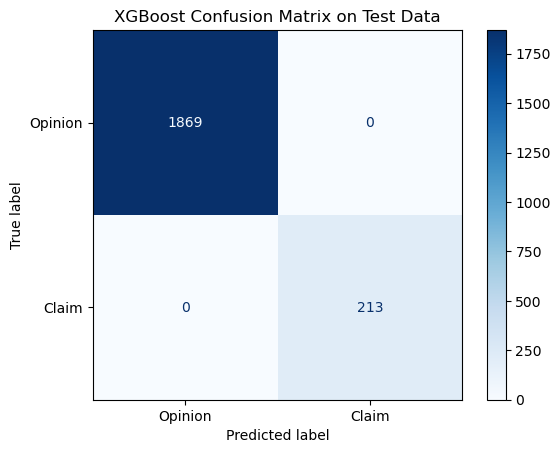

In [45]:
# Compute values for confusion matrix
xgb_conf_matrix = confusion_matrix(y_test, xgb_y_pred)

# Create display of confusion matrix
xgb_conf_matrix_display = ConfusionMatrixDisplay(xgb_conf_matrix, display_labels=['Opinion', 'Claim'])

# Plot confusion matrix
xgb_conf_matrix_display.plot(cmap='Blues')

# Display plot
plt.title('XGBoost Confusion Matrix on Test Data')
plt.show()


#### **Feature importances of champion model**


                           Feature  Importance
2                 video_view_count    0.560563
0                                #    0.384715
3                 video_like_count    0.035549
9         author_ban_status_banned    0.006333
6              video_comment_count    0.004070
4                video_share_count    0.003657
7                      text_length    0.003172
5             video_download_count    0.001785
1               video_duration_sec    0.000157
8         verified_status_verified    0.000000
10  author_ban_status_under review    0.000000


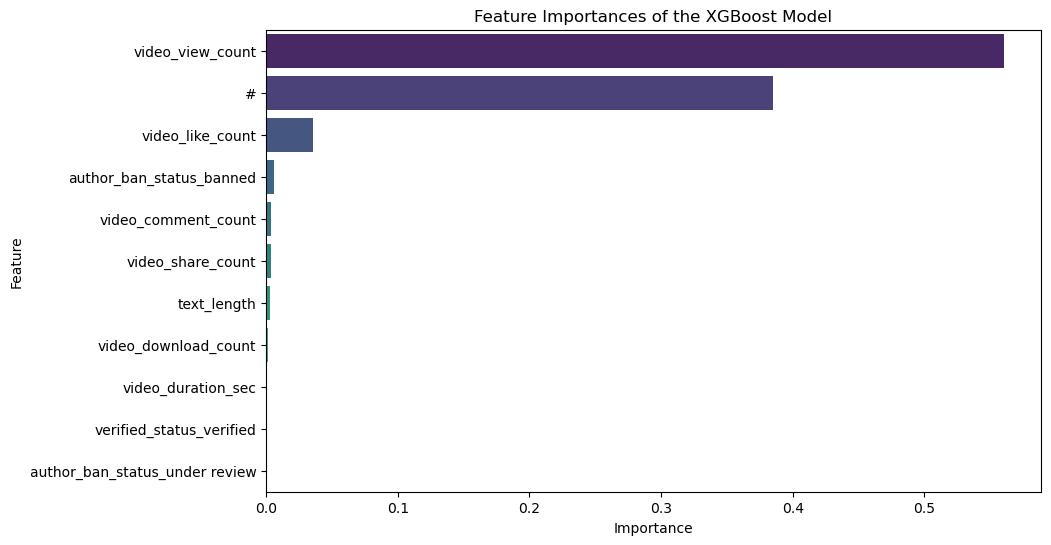

In [46]:
# Extract feature importances from the XGBoost model
xgb_feature_importances = xgb_best_estimator.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, hue='Feature', dodge=False, palette='viridis')
plt.title('Feature Importances of the XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.legend([],[], frameon=False)
plt.show()


**Question:** Describe your most predictive features. Were your results surprising?


The feature importance plot and the corresponding DataFrame show that the most predictive features in the XGBoost model are:

- **Video View Count**: This feature has the highest importance score (0.560563), indicating that the number of views a video receives is the most significant predictor of whether a video contains a claim or an opinion.
- **Hashtag Count (#)**: This feature has the second highest importance score (0.384715). It suggests that the number of hashtags used in a video is also a crucial factor in distinguishing between claims and opinions.
- **Video Like Count**: This feature, with an importance score of 0.035549, also contributes to the model's predictions, albeit to a lesser extent than video view count and hashtag count.

Other features such as author ban status, video comment count, video share count, and text length have much lower importance scores, indicating that they have a smaller impact on the model's predictions.

### Analysis of Results

The results align with expectations, as features related to video engagement metrics (view count, like count) are naturally significant indicators of the video's content type. Higher engagement metrics generally indicate more influential or controversial content, which aligns with the nature of claims versus opinions.

However, the dominance of the hashtag count as a predictive feature was somewhat surprising. This suggests that the use of hashtags plays a more critical role in distinguishing between claims and opinions than initially anticipated.

Overall, the insights derived from the feature importance analysis highlight the importance of engagement metrics and the content's contextual features (like hashtags) in predicting the nature of video content on TikTok.


### **Task 8. Conclusion**

### Conclusion
In this project I developed and evaluated machine learning models to classify TikTok video transcriptions as either claims or opinions. Using Random Forest and XGBoost classifiersIwe aimed to understand the key features that drive this classification and assess the model performance in accurately predicting the target variable. Here I summarize the findings and provide recommendations based on the model evaluation results.s.

#### Would you recommend using this model? Why or why not?
Yes, I would recommend using this model. Both the Random Forest and XGBoost models demonstrated excellent performance, achieving perfect recall and precision scores on the test data. This indicates that the models are highly effective at distinguishing between claims and opinions in TikTok video transcriptions. Given the high accuracy and robustness of these models, they can be reliably used for content classification tasks on the platform.

#### What was your model doing? Can you explain how it was making predictions?
The models were trained to classify TikTok video transcriptions as either claims or opinions based on various features. Key features included video view count, hashtag count, and video like count. The models learned patterns and relationships between these features and the target variable (claim_status). For instance, videos with higher view counts and more hashtags were more likely to be classified as containing claims. The models used these learned patterns to make predictions on new, unseen data, effectively identifying whether a video transcription was a claim or an opinion.

#### Are there new features that you can engineer that might improve model performance?
While the current models performed exceptionally well, there are always opportunities for improvement. Potential new features that could be engineered to enhance model performance include:
- **Sentiment Analysis**: Incorporating sentiment scores of the video transcriptions might provide additional context and improve classification accuracy.
- **Engagement Metrics Over Time**: Analyzing the trend of engagement metrics (views, likes, comments) over time could offer deeper insights into the nature of the video content.
- **User Behavior Features**: Features capturing user behavior, such as the frequency of posting claims versus opinions, could add value to the model.

#### What features would you want to have that would likely improve the performance of your model?
To further improve the model's performance, the following features would be valuable:
- **Textual Features**: Advanced textual features such as TF-IDF scores, topic modeling results, or embeddings from pre-trained language models (e.g., BERT) could enhance the model's understanding of the content.
- **User Demographics**: Information about the user's demographics, such as age, gender, and location, could help in understanding the context and audience of the content.
- **Video Metadata**: Additional metadata such as video duration, upload time, and video description could provide useful context for the model.

### Summary
The models developed in this project have shown remarkable performance in classifying TikTok video transcriptions as claims or opinions. The key predictive features included video view count, hashtag count, and video like count. While the models are currently highly effective, incorporating additional features such as sentiment analysis and user behavior metrics could further enhance their performance. Overall, the models provide a robust solution for content classification on TikTok, enabling more efficient and accurate content moderation and analysis.
